# FINAL PROJECT 4

```
**************************************
* Nama          : Roikhatul Miskiyah *
* Kode Peserta  : PYTN-KS05-010      *
* Batch         : 5                  *
* Project       : 4                  *
**************************************
```

# Kelompok 4
1. M. Ihwanul Iqbal - PYTN-KS05-004
2. Roikhatul Miskiyah - PYTN-KS05-010


**Outline:**
```
A. Perkenalan
B. Pustaka yang Dibutuhkan
C. Data Loading 
D. Data Cleaning
E. Eksplorasi Data
F. Data Preprocessing
G. Pendefinisian, Pelatihan, dan Evaluasi Model
H. Kesimpulan 
```

## A. Perkenalan

1. Latar belakang

Studi ini membutuhkan pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran. Sample dataset ini merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File pada level pelanggan dengan 18 variabel/ atribut perilaku.

2. Data yang digunakan

Dataset yang digunakan adalah dataset besar yang berisi 8950 baris dan 18 kolom, di sini kita akan menggunakan dataset credit card "CC GENERAL.csv" yang tersedia untuk digunakan https://www.kaggle.com/datasets/arjunbhasin2013/ccdata. Data tersebut berisi  transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. 

3. Objective yang ingin dicapai

Dalam penelitian ini kami memprediksi clustering pengguna kartu kredit menggunakan metode KMeans.

Berikut ini 18 atribut dataset kartu kredit:

1. CUSTID : Identitas Pemegang Kartu Kredit (Categorical)
2. BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. PURCHASES : Jumlah pembelian yang dilakukan dari akun
5. ONEOFFPURCHASES : Jumlah pembelian maksimum yang dilakukan dalam sekali jalan
6. INSTALLMENTSPURCHASES : Jumlah pembelian yang dilakukan secara mencicil
7. CASHADVANCE : Uang tunai di muka yang diberikan oleh pengguna
8. PURCHASESFREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. PURCHASESINSTALLMENTSFREQUENCY : Seberapa sering dilakukan pembelian secara mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. CASHADVANCEFREQUENCY : Seberapa sering uang tunai di muka dibayarkan
12. CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
13. PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan
14. CREDITLIMIT : Batas Kartu Kredit untuk pengguna
15. PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS : Jumlah pembayaran minimum yang dilakukan oleh pengguna
17. PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. TENURE : Jangka waktu layanan kartu kredit untuk pengguna

## B. Pustaka yang Dibutuhkan

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## C. Data Loading 

In [115]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [116]:
CC = '/content/drive/My Drive/FP4/CC GENERAL.csv'

In [117]:
df = pd.read_csv(CC)
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [118]:
df.shape

(8950, 18)

Berisi 8950 baris dengan 18 kolom.

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [120]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [121]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950.0,NaN,NaN,NaN,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,NaN,NaN,NaN,592.437371,1659.887917,0.0,0.0,38.0,577.405,40761.25
INSTALLMENTS_PURCHASES,8950.0,NaN,NaN,NaN,411.067645,904.338115,0.0,0.0,89.0,468.6375,22500.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.490351,0.401371,0.0,0.083333,0.5,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.202458,0.298336,0.0,0.0,0.083333,0.3,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,NaN,NaN,NaN,0.364437,0.397448,0.0,0.0,0.166667,0.75,1.0


## D. Data Cleaning

**Memvalidasi duplikasi dari dataset**

In [122]:
df.duplicated().sum()

0

Hasil di atas menunjukkan bahwa tidak terdapat duplikasi data.

**Menghapus kolom unik yang tidak dibutuhkan untuk analisis**

In [123]:
df_clus = df.drop('CUST_ID', axis = 1)
df_clus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [124]:
# melihat dataset setelah kolom CUST_ID di hapus
df_clus.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Memvalidasi outliers**

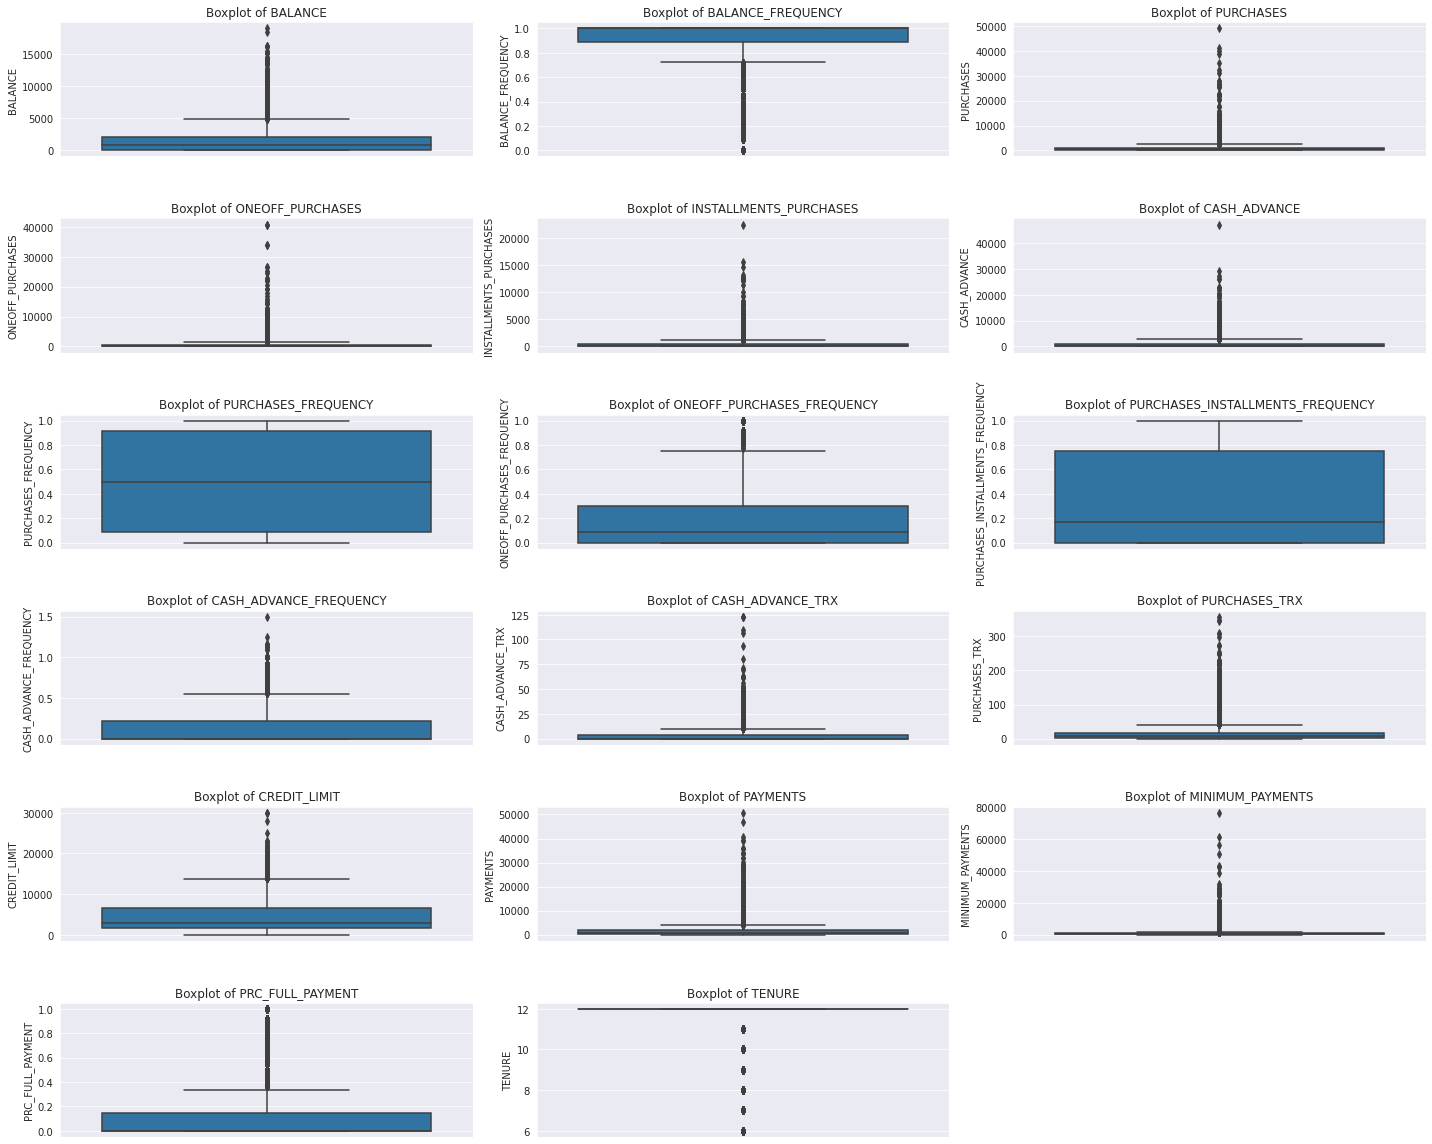

In [125]:
plt.figure(figsize = (20,16))
Features = df_clus.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = df_clus[Features[i]], data = df_clus)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

Outliers ada disemua kolom atau atribut dataset kecuali pada atribut PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY

**Menghapus Outliers**

In [126]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [127]:
df_clus.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [128]:
# daftar kolom tanpa TENURE
col_df = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
print(col_df)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [129]:
Feature_list = col_df
for i in Feature_list:
    lr, ur = detect_outliers(df_clus[i])
    df_clus[i] = np.where(df_clus[i] > ur, ur,df_clus[i])
    df_clus[i] = np.where(df_clus[i] < lr, lr,df_clus[i])

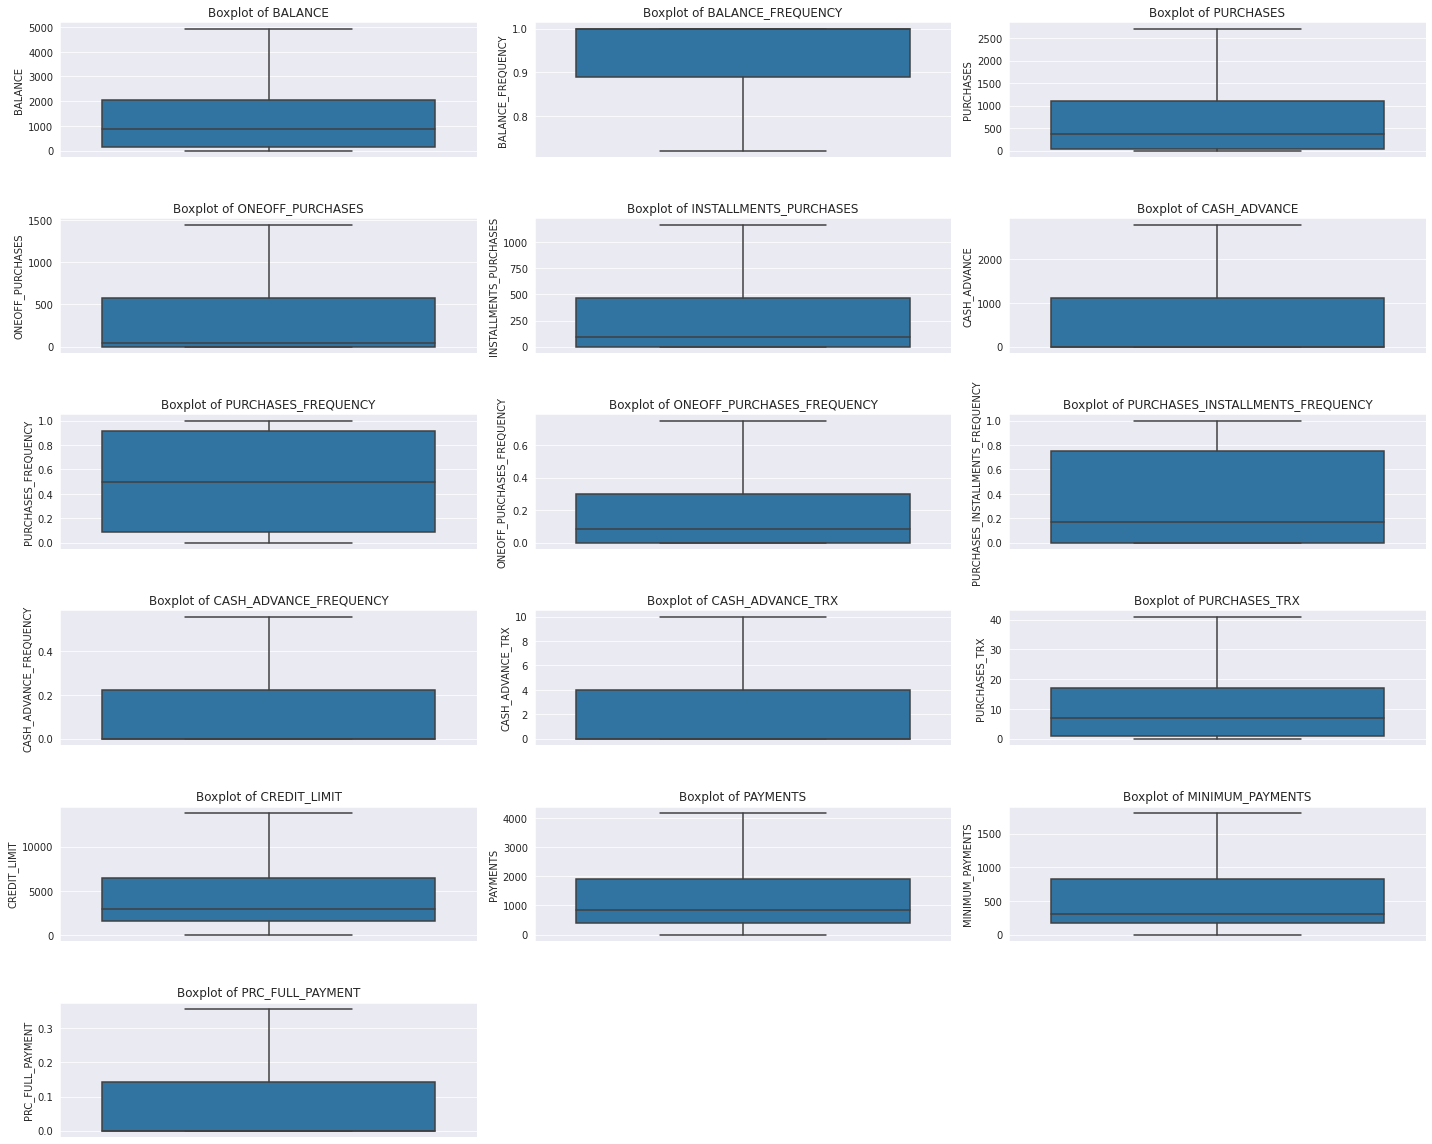

In [130]:
plt.figure(figsize = (20,16))
Features = col_df
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = df_clus[Features[i]], data = df_clus)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [131]:
df_clus['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

**Memvalidasi missing value pada dataset**

In [132]:
df_clus.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Hasil di atas menunjukkan bahwa terdapat 2 kolom yang mengandung missing value, yakni sebanyak 1 missing value pada kolom CREDIT_LIMIT dan sebanyak 313 pada kolom MINIMUM_PAYMENTS. Semua missing value akan diisi dengan nilai median

In [133]:
df_clus.CREDIT_LIMIT = df_clus.CREDIT_LIMIT.fillna(df_clus.CREDIT_LIMIT.median())
df_clus.MINIMUM_PAYMENTS = df_clus.MINIMUM_PAYMENTS.fillna(df_clus.MINIMUM_PAYMENTS.median())
df_clus.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [134]:
# menampilkan data setelah penanganan missing value
df_clus.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12


## E. Eksplorasi Data

**Scalling data menggunakan Z-Score**

In [135]:
zscore = StandardScaler() 
zscore.fit(df_clus)
df_clus_scaled= pd.DataFrame(zscore.transform(df_clus),columns = df_clus.columns)
df_clus_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1.656416e-15,1.000056,-0.904424,-0.820986,-0.336351,0.431643,2.310587
BALANCE_FREQUENCY,8950.0,-9.221847e-15,1.000056,-1.886552,-0.384745,0.616459,0.616459,0.616459
PURCHASES,8950.0,2.604558e-16,1.000056,-0.838160,-0.793093,-0.427374,0.424090,2.249864
ONEOFF_PURCHASES,8950.0,-1.877009e-15,1.000056,-0.692383,-0.692383,-0.618135,0.435813,2.128108
INSTALLMENTS_PURCHASES,8950.0,5.794248e-16,1.000056,-0.746029,-0.746029,-0.521371,0.436923,2.211351
CASH_ADVANCE,8950.0,2.616777e-15,1.000056,-0.673507,-0.673507,-0.673507,0.442033,2.115343
PURCHASES_FREQUENCY,8950.0,-3.716084e-16,1.000056,-1.221758,-1.014125,0.024043,1.062211,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,-5.425009e-15,1.000056,-0.722749,-0.722749,-0.396788,0.450714,2.210909
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,2.353921e-16,1.000056,-0.916995,-0.916995,-0.497629,0.970151,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.025995e-15,1.000056,-0.730084,-0.730084,-0.730084,0.556915,2.487414


In [136]:
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(df_clus_scaled)
    wss.append(k_means.inertia_)
    print(f"The inertia of {i} clusters : {k_means.inertia_}")

The inertia of 1 clusters : 152149.99999999994
The inertia of 2 clusters : 118313.6542996912
The inertia of 3 clusters : 96333.5707910594
The inertia of 4 clusters : 85596.51588472328
The inertia of 5 clusters : 79241.29800104254
The inertia of 6 clusters : 74091.35629669402
The inertia of 7 clusters : 69181.82974791627
The inertia of 8 clusters : 65193.92377750516
The inertia of 9 clusters : 62215.964008918636
The inertia of 10 clusters : 59528.15829660071


## F. Data Preprocessing


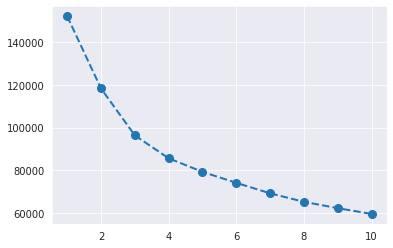

In [137]:
plt.plot(range(1,11),wss, marker='o', linestyle='dashed',
         linewidth=2, markersize=8);

Dari plot di atas, kita dapat melihat terdapat penurunan tajam dalam inersia dari cluster = 1 sampai cluster = 4, maka kita dapat memilih cluster 3 atau 4. Tapi kami akan memverifikasi siluet_score untuk cluster hingga 10.


## G. Pendefinisian, Pelatihan, dan Evaluasi Model


**Prediksi KMeans dan silhouette_score dengan n score**

In [138]:
sil_score = []
sil_width_min = []
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state = 123)
    k_means.fit(df_clus_scaled)
    labels = k_means.labels_
    score = silhouette_score(df_clus_scaled,labels, random_state = 123)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")
    min_width = silhouette_samples(df_clus_scaled,labels).min()
    sil_width_min.append(min_width)
    print(f"The Silhouette Width of {i} clusters : {min_width}")

The Silhouette Score of 2 clusters : 0.22117694804286958
The Silhouette Width of 2 clusters : -0.07389218676365954
The Silhouette Score of 3 clusters : 0.22353520458226017
The Silhouette Width of 3 clusters : -0.09524343036606951
The Silhouette Score of 4 clusters : 0.19652120177573343
The Silhouette Width of 4 clusters : -0.12032206694098962
The Silhouette Score of 5 clusters : 0.1869940365221811
The Silhouette Width of 5 clusters : -0.17449087311187225
The Silhouette Score of 6 clusters : 0.1878303033169949
The Silhouette Width of 6 clusters : -0.193630856675764
The Silhouette Score of 7 clusters : 0.19793075591137158
The Silhouette Width of 7 clusters : -0.19924363842458984
The Silhouette Score of 8 clusters : 0.20173849250916714
The Silhouette Width of 8 clusters : -0.1971618386131235
The Silhouette Score of 9 clusters : 0.19310863802301348
The Silhouette Width of 9 clusters : -0.20615852465142417
The Silhouette Score of 10 clusters : 0.19197256197285356
The Silhouette Width of 10 

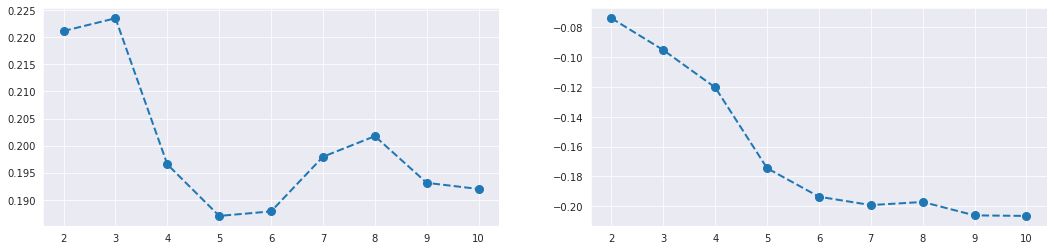

In [139]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
plt.plot(range(2,11),sil_score, marker='o', linestyle='dashed',linewidth=2, markersize=8);
plt.subplot(1,2,2)
plt.plot(range(2,11),sil_width_min, marker='o', linestyle='dashed',linewidth=2, markersize=8);

1. Siluet_score tertinggi adalah cluster 3 dan terendah untuk cluster 5 & 6.
2. Siluet Width, semua nilai untuk semua cluster yang dianalisis adalah negatif, dengan nilai minimum pada n = 9 dan maksimum pada n = 2.

**KMeans dengan clusters = 3**

In [140]:
k_Means4 = KMeans(n_clusters = 3,random_state = 123)
k_Means4.fit(df_clus_scaled)
labels = k_Means4.labels_
df['Cluster_Labels_3'] = labels
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels_3
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2


In [141]:
silhouette_score(df_clus_scaled,labels,random_state = 123)

0.22353520458226017

In [142]:
sil_width = silhouette_samples(df_clus_scaled,labels)
df['Sil_Width_3'] = sil_width
sil_width.min()

-0.09524343036606951

In [143]:
df_out = df.groupby(by = 'Cluster_Labels_3').sum()[['PURCHASES','PAYMENTS','TENURE']].reset_index()
df_out.head(3)

,Cluster_Labels_3,PURCHASES,PAYMENTS,TENURE
0,0,1791946.41,3.365173e+06,52435
1,1,564281.71,5.347296e+06,26271
2,2,6622455.14,6.799168e+06,24374


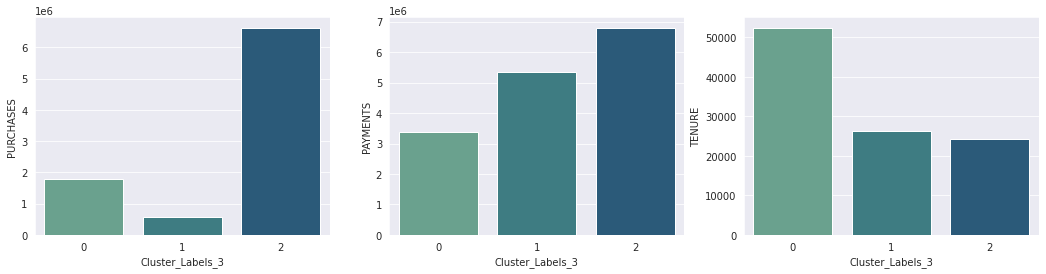

In [144]:
sns.set_style("darkgrid")
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'Cluster_Labels_3',y = 'PURCHASES', data = df_out, palette = 'crest', seed = 123);
plt.subplot(1,3,2)
sns.barplot(x= 'Cluster_Labels_3',y = 'PAYMENTS', data = df_out, palette = 'crest', seed = 123);
plt.subplot(1,3,3)
sns.barplot(x= 'Cluster_Labels_3',y = 'TENURE', data = df_out, palette = 'crest', seed = 123);

In [145]:
df_clus.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12


In [152]:
# untuk input deploy heroku 
km = df_clus.head(5)
print(km)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40            0.0000   
1  3202.467416           0.909091       0.00            0.0000   
2  2495.148862           1.000000     773.17          773.1700   
3  1666.670542           0.722223    1499.00         1443.5125   
4   817.714335           1.000000      16.00           16.0000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   2784.552848             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [153]:
# hasil output deploy heroku
prediction = k_Means4.predict(km)
print(prediction)

[2 1 2 2 2]


## H. Kesimpulan 

1. Cluster 0 : Jumlah tertinggi adalah TENURE, untuk medium adalah PAYMENTS, dan nilai paling rendah adalah PURCHASES. 
2. Cluster 1 : Jumlah paling tinggi adalah PAYMENTS, untuk medium adalah TENURE, dan yang paling rendah adalah PURCHASES.
3. Cluster 2 : Jumlah tertinggi PURCHASES dan PAYMENTS sedangkan terendah adalah TENURE.

                                                                    --- SELESAI ---